In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


def exact_solution(x, epsilon, s):
    return 1 - s*x + (s-1) * (1 - np.exp(-x/epsilon)) / (1 - np.exp(-1/epsilon))


def solve_convection_diffusion(N, epsilon, s, scheme):
    dx = 1.0 / N
    A = np.zeros((N+1, N+1))
    b = np.zeros(N+1)
    
    A[0, 0] = 1
    b[0] = 1
    A[N, N] = 1
    b[N] = 0
    
    for j in range(1, N):
        if scheme == 'A':
            A[j, j-1] = -epsilon / dx**2 + 1 / (2*dx)
            A[j, j] = 2 * epsilon / dx**2
            A[j, j+1] = -epsilon / dx**2 - 1 / (2*dx)
        
        elif scheme == 'B':
            A[j, j-1] = -epsilon / dx**2 + 1 / dx
            A[j, j] = 2 * epsilon / dx**2 - 1 / dx
            A[j, j+1] = -epsilon / dx**2
        
        elif scheme == 'C':
            if j < N-1:
                A[j, j-1] = -epsilon / dx**2
                A[j, j] = 2 * epsilon / dx**2 + 3 / (2*dx)
                A[j, j+1] = -epsilon / dx**2 - 4 / (2*dx)
                A[j, j+2] = 1 / (2*dx)
            else:
                A[j, j-1] = -epsilon / dx**2
                A[j, j] = 2 * epsilon / dx**2 + 2 / (2*dx)
                A[j, j+1] = -epsilon / dx**2 - 4 / (2*dx)
        
        b[j] = s
    
    u = np.linalg.solve(A, b)
    return u



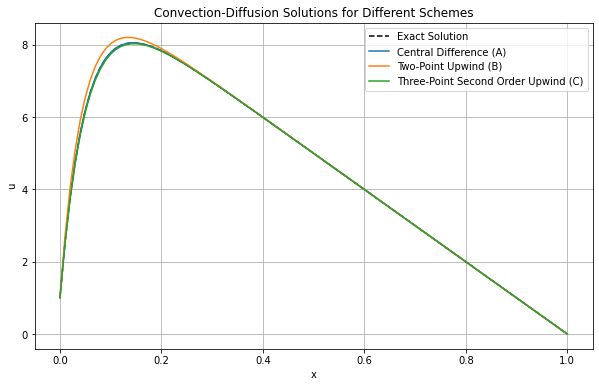

In [6]:
N = 100  # Number of grid points
epsilon = 1/20  # Given value for epsilon
s = 10  # Source term

x = np.linspace(0, 1, N+1)

# Solve for each scheme
uA = solve_convection_diffusion(N, epsilon, s, 'A')
uB = solve_convection_diffusion(N, epsilon, s, 'B')
uC = solve_convection_diffusion(N, epsilon, s, 'C')
u_exact = exact_solution(x, epsilon, s)

# Plot
plt.figure(figsize=(10,6))
plt.plot(x, u_exact, 'k--', label="Exact Solution")
plt.plot(x, uA, label="Central Difference (A)")
plt.plot(x, uB, label="Two-Point Upwind (B)")
plt.plot(x, uC, label="Three-Point Second Order Upwind (C)")

plt.xlabel("x")
plt.ylabel("u")
plt.title("Convection-Diffusion Solutions for Different Schemes")
plt.legend()
plt.grid(True)
plt.show()


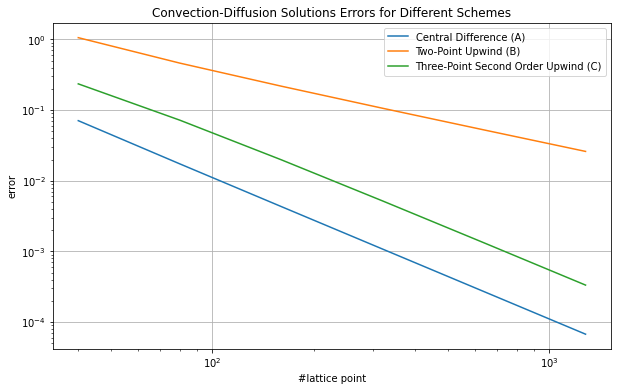

In [7]:
epsilon = 1/20  # Given value for epsilon
s = 10  # Source term
N0 = 20
ord_lst = list(range(1,7))
err_A = []
err_B = []
err_C = []
h_lst = []

for ord in ord_lst:
    N = N0*(2**ord)
    x = np.linspace(0, 1, N+1)
    # Solve for each scheme
    uA = solve_convection_diffusion(N, epsilon, s, 'A')
    uB = solve_convection_diffusion(N, epsilon, s, 'B')
    uC = solve_convection_diffusion(N, epsilon, s, 'C')
    u_exact = exact_solution(x, epsilon, s)
    
    err_A.append(np.linalg.norm(uA-u_exact,np.inf))
    err_B.append(np.linalg.norm(uB-u_exact,np.inf))
    err_C.append(np.linalg.norm(uC-u_exact,np.inf))
    h_lst.append(N)
    

    
# Plot
plt.figure(figsize=(10,6))
plt.plot(h_lst, err_A, label="Central Difference (A)")
plt.plot(h_lst, err_B, label="Two-Point Upwind (B)")
plt.plot(h_lst, err_C, label="Three-Point Second Order Upwind (C)")

plt.xlabel("#lattice point")
plt.ylabel("error")
plt.title("Convection-Diffusion Solutions Errors for Different Schemes")
plt.legend()
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.grid(True)
plt.show()

In [8]:
slopeA = stats.linregress(np.log(h_lst),np.log(err_A))
slopeB = stats.linregress(np.log(h_lst),np.log(err_B))
slopeC = stats.linregress(np.log(h_lst),np.log(err_C))
print("slopeA",slopeA)
print("slopeB",slopeB)
print("slopeC",slopeC)

slopeA LinregressResult(slope=-2.0065835718163525, intercept=4.745605318285842, rvalue=-0.9999966460521486, pvalue=1.6873430421123264e-11, stderr=0.002598492692183135, intercept_stderr=0.014420268698097065)
slopeB LinregressResult(slope=-1.0632597344023629, intercept=3.9196640351145344, rvalue=-0.9995240148190874, pvalue=3.397889186209624e-07, stderr=0.01640877526403826, intercept_stderr=0.09106007841620054)
slopeC LinregressResult(slope=-1.9017777076331877, intercept=5.662021918604931, rvalue=-0.9996533286516501, pvalue=1.802507039912975e-07, stderr=0.025044748235509312, intercept_stderr=0.13898518942103055)
